<a href="https://colab.research.google.com/github/chogh824/machine-learning/blob/main/3%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

iris = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv')
iris.head()
# 클래스 추출
# 입력 데이터, 출력 데이터 생성
# 훈련 세트와 테스트 세트로 나누기
# 데이터 표준화
# k- 최근접 이웃 알고리즘 이용하여 훈련하고 훈련 세트와 테스트 세트에 대해 평가하기
# 테스트 세트 5개의 데이터에 대해 예측과 확률 알아보기
# 최적화하기
# 로지스틱 회귀를 이용하여 다중 분류 훈련 및 최적화 하기
# 확률적 경사 하강법을 이용하여 다중 분류 훈련 및 최적화하기

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
print(pd.unique(iris['Species'])) # 클래스 추출

['setosa' 'versicolor' 'virginica']


In [ ]:
iris_input = iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].to_numpy() #to_numpy() 메서드로 넘파이 배열로 바꾸어 iris_input에 저장

In [ ]:
print(iris_input[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
iris_target = iris['Species'].to_numpy()  #타깃 데이터 생성

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(iris_input, iris_target, stratify=iris_target, random_state=42)
# 데이터 세트 나누기, stratify 함수로 클래스 비율에 맞게 데이터 나누기

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)  # 데이터 표준화

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.9821428571428571
0.9210526315789473


In [ ]:
print(kn.classes_)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(kn.predict(test_scaled[:5]))

['setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa']


In [ ]:
print(train_input.shape, test_input.shape)

(112, 4) (38, 4)


In [ ]:
print(train_target.shape, test_target.shape)

(112,) (38,)


In [ ]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5]) #클래스별 확률값을 반환
print(np.round(proba, decimals=4))  #소수점 네 번째 자리까지 표기, 다섯 번째 자리에서 반올림.

[[1.  0.  0. ]
 [0.  0.6 0.4]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[1:2])  # 두 번째 샘플의 최근접 이웃의 클래스 확인용
print(train_target[indexes])

[['versicolor' 'virginica' 'versicolor' 'virginica' 'versicolor']]


versicolor 3, virginica 2 최근접 이웃 또한 예측값과 일치함!

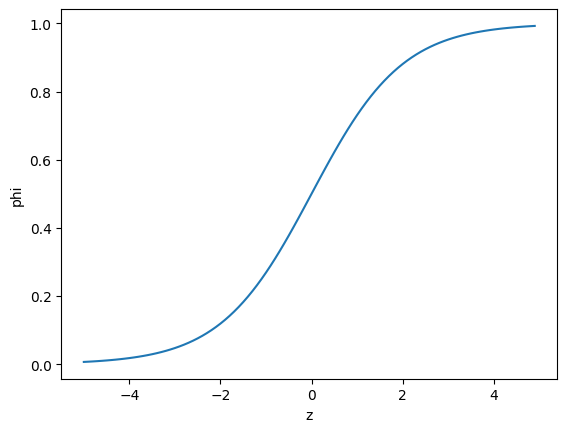

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()  #로지스틱 함수

In [ ]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])    # 이진 분류

['A' 'C']


In [ ]:
setosa_versicolor_indexes = (train_target == 'setosa') | (train_target == 'versicolor')   #setosa와 versicolor에 대한 행만 골라내기
train_setosa_versicolor = train_scaled[setosa_versicolor_indexes]
target_setosa_versicolor = train_target[setosa_versicolor_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_setosa_versicolor, target_setosa_versicolor) #훈련

LogisticRegression()

In [ ]:
print(lr.predict(train_setosa_versicolor[:5]))  #예측

['versicolor' 'versicolor' 'versicolor' 'setosa' 'setosa']


In [ ]:
print(lr.predict_proba(train_setosa_versicolor[:5]))  #확률

[[0.03867644 0.96132356]
 [0.02707701 0.97292299]
 [0.0232982  0.9767018 ]
 [0.98298294 0.01701706]
 [0.95052835 0.04947165]]


In [ ]:
print(lr.classes_)  # setosa가 0, versicolor가 1 즉, 양성 클래스임을 확인

['setosa' 'versicolor']


In [ ]:
print(lr.coef_, lr.intercept_)  # 기울기 및 절편(가중치, 계수) # 시그모이드 함수들의 계수가 다 나옴!

[[ 1.01904629 -1.28679375  1.52830579  1.42090192]] [2.14003707]


In [ ]:
decisions = lr.decision_function(train_setosa_versicolor[:5]) #decision_function z값 계산하는데 중요!
print(decisions)

[ 3.21308037  3.58161987  3.73580507 -4.05637548 -2.95561816]


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)  # 다중 분류 훈련
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9821428571428571
0.9473684210526315


In [ ]:
print(lr.predict(test_scaled[:5]))

['setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.999 0.001 0.   ]
 [0.003 0.938 0.059]
 [0.004 0.994 0.001]
 [0.    0.995 0.004]
 [0.998 0.002 0.   ]]


In [ ]:
print(lr.classes_)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)  #coef_의 배열의 열이 4개, 행이 3개

(3, 4) (3,)


In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ 14.49   7.22 -21.71]
 [ -2.88   2.82   0.06]
 [ -1.46   3.99  -2.52]
 [ -3.4    4.44  -1.04]
 [ 13.45   7.44 -20.9 ]]


In [ ]:
from scipy.special import softmax

proba = softmax(decision, axis=1) #소프트맥스 함수
print(np.round(proba, decimals=3))

[[0.999 0.001 0.   ]
 [0.003 0.938 0.059]
 [0.004 0.994 0.001]
 [0.    0.995 0.004]
 [0.998 0.002 0.   ]]


In [ ]:
from sklearn.linear_model import SGDClassifier  #확률적 경사 하강법

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print(sc.coef_,sc.intercept_)

0.8392857142857143
0.7631578947368421
[[ -1.7869281    2.95630265  -3.40604012  -3.24188287]
 [  0.19220656  -6.8563984    8.72476316 -15.49350527]
 [ -0.84386405 -11.2561908   27.79121832  31.79025786]] [ -4.59859683  -9.75311272 -31.47659983]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


에포크가 적기 때문에 경고문이 뜸

In [ ]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9285714285714286
0.8421052631578947


In [ ]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
for _ in range(0,500):    # 에포크가 진행됨에 따라 과대적합이 어느 지점에서부터 육안으로 보이는지 확인하기 위해 500까지 늘림
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

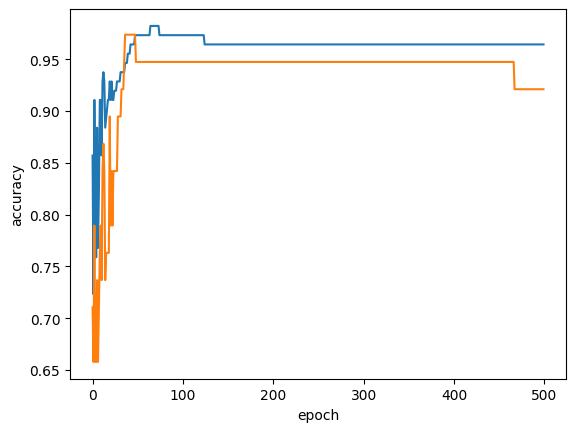

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

대략 480회 정도 이후에 과대적합이 일어나는 것을 확인해볼 수 있으나, 0~100 사이의 결과가 흥미로워 범위를 다시 설정

In [ ]:
for _ in range(0,72):    # 제대로 테스트 세트가 언제 높아지는지를 확인하기 위해 에포크 횟수 대폭 낮춤
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

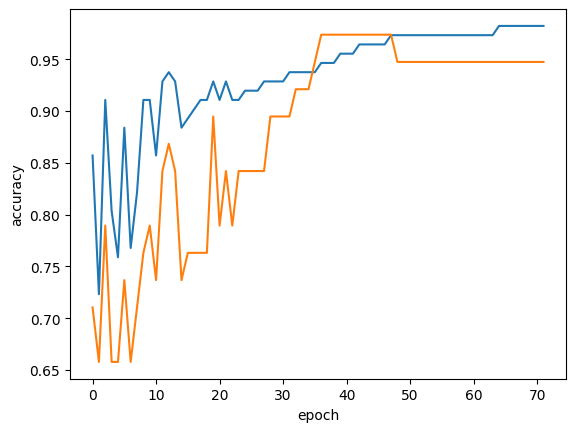

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

46~50 사이에서 만족스러운 점수가 나올 것으로 예상

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter =46, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8928571428571429
0.8157894736842105


In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter =47, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9642857142857143
0.8947368421052632


In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter =48, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9732142857142857
0.8947368421052632


In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter =49, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9285714285714286
0.8947368421052632


In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter = 50, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9553571428571429
0.868421052631579


46부터 50까지 다 해봤으나 만족스러운 테스트 점수가 나오지 않음!
그래서 최적의 반복 횟수를 훈련세트 점수가 가장 높아지는 구간 중 하나인 70으로 설정함

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter =70, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9732142857142857
0.9473684210526315


In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=70, tol=None, random_state=42)    # 힌지 손실
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9642857142857143
0.9473684210526315
